In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
def elapsed(sec):
    if sec < 60:
        return "{:.2f}".format(sec) + " sec"
    elif sec < (60 * 60):
        return "{:.2f}".format(sec / 60) + " min"
    else:
        return "{:.2f}".format(sec / (60 * 60)) + " hr"

In [3]:
def showimg(img):
    plt.figure("Image")
    plt.imshow(img,cmap='gray')
    plt.axis('on')
    plt.title('image')
    plt.show()

In [4]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
HIDDEN_SIZE=128
INPUT_SIZE=787
INPUT_NUMBER=128
LAYER_NUMBER=4

In [6]:
def make_layer(INPUT_SIZE,HIDDEN_SIZE,LAYER_NUMBER):
    x = tf.placeholder(tf.float32, [None, INPUT_SIZE])
    weights={'W0':tf.Variable(tf.truncated_normal([INPUT_SIZE, HIDDEN_SIZE], stddev=0.1))}
    bias={'b0':tf.Variable(tf.constant(0.1, shape=[HIDDEN_SIZE]))}
    a={'a0':tf.nn.tanh(tf.matmul(x, weights['W0']) + bias['b0'])}
    for i in range(1,LAYER_NUMBER+1):
        weights['W'+str(i)] = tf.Variable(tf.truncated_normal([HIDDEN_SIZE, HIDDEN_SIZE], stddev=0.1))
        bias['b' + str(i)] = tf.Variable(tf.constant(0.1, shape=[HIDDEN_SIZE]))
        a['a' + str(i)] = tf.nn.tanh(tf.matmul(a['a' + str(i-1)],weights['W'+str(i)]) + bias['b' + str(i)])
    weights['W' + str(LAYER_NUMBER+1)] = tf.Variable(tf.truncated_normal([HIDDEN_SIZE, 784], stddev=0.1))
    bias['b' + str(LAYER_NUMBER+1)] = tf.Variable(tf.constant(0.1, shape=[784]))
    y = tf.nn.sigmoid(tf.matmul(a['a' + str(LAYER_NUMBER)],weights['W'+str(LAYER_NUMBER+1)])
                      + bias['b' + str(LAYER_NUMBER+1)])
    return x,y 
x,y=make_layer(INPUT_SIZE,HIDDEN_SIZE,LAYER_NUMBER)

In [7]:
def make_index(NUM,INPUT_SIZE):
    l=np.array([])
    for i in range(NUM):
        p=np.zeros((INPUT_SIZE))
        b=bin(i)[2:]
        _=len(b)-1
        for k in b:
            p[_]=k
            _-=1
        l=np.append(l,p)
    return l.reshape(-1,INPUT_SIZE)

In [8]:
global_step = tf.Variable(0)
learning_rate = tf.train.exponential_decay(0.001,global_step,2000, 0.98, staircase=True) 

In [9]:
labels=tf.placeholder(tf.float32, [None, 784])
loss=tf.losses.mean_squared_error(labels,y)
train_step = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss,global_step=global_step)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [10]:
batch_xs, batch_ys = mnist.train.next_batch(INPUT_NUMBER)
inp=[]
tran=[]
ind=np.zeros(3)
for i in range(len(batch_xs)):
    t_=batch_xs[i].reshape(28,28)
    t_=t_.reshape(-1)
    tran.append(t_)
    z=ind
    z[0]=1
    inp_=np.append(batch_xs[i],z)
    inp.append(inp_)
for i in range(len(batch_xs)):
    t_=batch_xs[i][::-1].reshape(28,28)
    t_=t_.reshape(-1)
    tran.append(t_)
    z=ind
    z[1]=1
    inp_=np.append(batch_xs[i],z)
    inp.append(inp_)
for i in range(len(batch_xs)):
    im=batch_xs[i].reshape(28,28)
    im_=np.zeros((im.shape[1],im.shape[0]))
    for j in range(im.shape[0]):
        im_[:,-j]=im[j]
    t_=im_
    t_=t_.reshape(-1)
    tran.append(t_)
    z=ind
    z[2]=1
    inp_=np.append(batch_xs[i],z)
    inp.append(inp_)
inp=np.array(inp)
tran=np.array(tran)
print(inp.shape)
print(tran.shape)


(384, 787)
(384, 784)


In [11]:
cost=1
i=0
start_time=time.time()
while cost>0.0001:
    unuse,cost=sess.run([train_step,loss],feed_dict={x:inp,labels:tran})
    if i % 1000==0:
        print(cost)
    if i==500:
        tpi=(time.time() - start_time)/500
        print('TPI:'+str(tpi)+'sec')
    i+=1
print('ITERATION:'+str(i))
print("Elapsed time: ", elapsed(time.time() - start_time))

0.25591588
TPI:0.00597902774810791sec
0.017251674
0.0032495048
0.0013014646
0.0007239949
0.00046059975
0.0003481979
0.00026813414
0.00022124895
0.00019031565
0.00017412438
0.00015113724
0.00014664345
0.00013692
0.00012793337
0.00012429198
0.00011818058
0.000114395
0.00012143382
0.00012342747
0.00010742052
ITERATION:20952
Elapsed time:  2.03 min


In [12]:
newimg,lb=mnist.test.next_batch(1)
newimg=newimg.reshape(-1)

newimg:


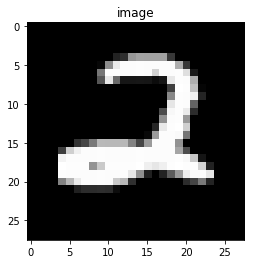

GROUND TRUTH1:


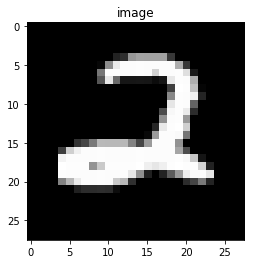

TRANS1:


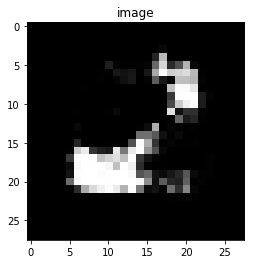

GROUND TRUTH2:


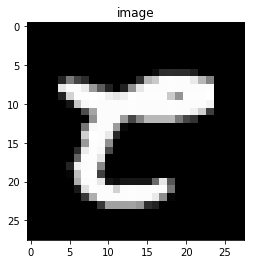

TRANS2:


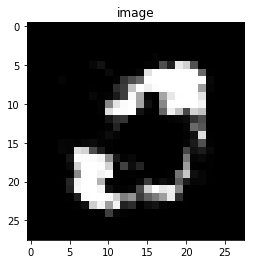

GROUND TRUTH3:


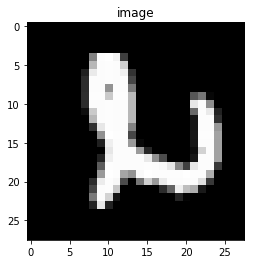

TRANS3:


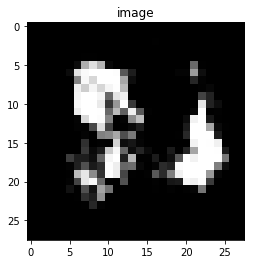

In [13]:
z=np.zeros(3)
print('newimg:')
showimg(newimg.reshape(28,28))
print('GROUND TRUTH1:')
showimg(newimg.reshape(28,28))
print('TRANS1:')
k=z
k[0]=1
inpt=np.append(newimg,k).reshape(1,-1)
oupt=sess.run(y,feed_dict={x:inpt})
showimg(oupt.reshape(28,28))
print('GROUND TRUTH2:')
newimg1=newimg[::-1].reshape(28,28)
newimg1=newimg1.reshape(-1)
showimg(newimg1.reshape(28,28))
print('TRANS2:')
k=z
k[1]=1
inpt=np.append(newimg,k).reshape(1,-1)
oupt=sess.run(y,feed_dict={x:inpt})
showimg(oupt.reshape(28,28))
print('GROUND TRUTH3:')
im=newimg.reshape(28,28)
im_=np.zeros((im.shape[1],im.shape[0]))
for i in range(im.shape[0]):
    im_[:,-i]=im[i]
showimg(im_)
print('TRANS3:')
k=z
k[2]=1
inpt=np.append(newimg,k).reshape(1,-1)
oupt=sess.run(y,feed_dict={x:inpt})
showimg(oupt.reshape(28,28))

In [14]:
inpt=inp[0]
inpt.shape

(787,)

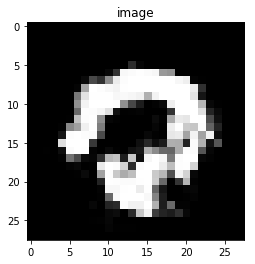

In [15]:
inpt=inpt.reshape(-1)
inpt[-1]=1
inpt=inpt.reshape(1,-1)
oupt=sess.run(y,feed_dict={x:inpt})
showimg(oupt.reshape(28,28))

In [16]:
inpt[-1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

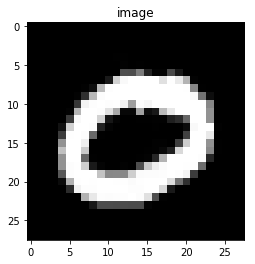

In [17]:
oupt=sess.run(y,feed_dict={x:inp[256].reshape(1,-1)})
showimg(oupt.reshape(28,28))